# Vision Model Demo

This notebook illustrates how to run a Neurokernel-based model of portions of the fly's vision system.

### Background

In addition to the retina where the photo-transduction takes place, the optic
lobe of the *Drosophila* can be divided into 4 major LPUs on each side of
the fly brain respectively referred to as the lamina, medulla, lobula and lobula
plate. Visual information progresses along a processing path that starts at the
retina and successively passes through the lamina, medulla, and either the
lobula or the lobula plate. The spatial structure of the visual stimulus is
preserved by the retinotopic columnar organization of most of these LPUs.

There are at least 120 different types of neurons in the optic lobe. 
Most of the neurons in the optic lobe (if not all)
do not emit spikes; rather, they communicate via chemical synapses where
neurotransmitter is tonically released based on the graded potential of the
presynaptic neurons. The synapses can have varying amount of delays based on the
different neurotransmitters. Many neurons in the optic lobe also communicate
through gap junctions.

The current vision system model is based upon available connectome data for the
lamina [(Rivera-Alba et al., 2011)](#rivera-alba_wiring_2011) and medulla
[(Fischbach et al., 1989;](#fischbach_optic_1989)[ Higgins et al., 2004)](#higgins_computational_2004). The model
consists of two LPUs; the first contains 9516 neurons (or about 90% of the
cells) in the retina and lamina, while the second contains 6920 (or about 17%
of the cells) in the medulla and several neurons that connect to both the
medulla and first layer of the lobula.  All neurons are modeled using the
Morris-Lecar model with parameters selected to not elicit spiking activity. 
Synapses are modeled using a simple model of tonic neurotransmitter release and 
its effect upon postsynaptic conductance. The model does not currently comprise gap junctions.


### Specification of Neurons and Synapses in Lamina

First, we import some plotting utilities:

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as p

Assuming that the Neurokernel source has been cloned to ``~/neurokernel``, we first 
consider the two csv files that specify neurons and synapses in the lamina model.


In [2]:
%cd -q ~/neurokernel/examples/vision/data

The neuron model types and their parameter values are specified in the file ``neuron_type_lamina.csv``. The entire list of neurons is shown below. Note that for convenience, the LPU contains neurons from both the retina and lamina. Descriptions of each of the columns follow:

* ``name`` - Name of neuron morphological type.
* ``model`` - Specifies the name of the class implementing the neuron model. 
* ``columnar`` - A value of 1 in column indicates that the neuron/element is a columnar neuron/element; a number greater than 1 indicates the total number of non-columnar neurons of the specified ``name`` in the lamina. 
* ``dummy`` - Used to indicate alpha-profiles.
* ``input`` - Indicates whether the neuron is an input axon from another LPU.
* ``output`` - Indicates whether the neuron is an output neuron.
* ``extern`` - Specifies if the neuron receives external input, e.g., a video signal. 
* ``public`` - Specifies if the neuron may communicate with other LPUs via Neurokernel's API. 

The remaining columns in the table are neuron model parameters.

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 20)
mpl.rcParams['figure.figsize'] = (17, 7)
neuron_data = pd.read_csv("./neuron_types_lamina.csv")
neuron_data = neuron_data.dropna(axis=1)
neuron_data.head(n=100)

,name,model,columnar,dummy,input,output,extern,public,V1,V2,V3,V4,phi,initV,initn,offset
0,R1,MorrisLecar,1,0,0,0,1,0,0.030,0.015,0.00,0.030,0.0250,-0.05214,0.0300,0.00
1,R2,MorrisLecar,1,0,0,0,1,0,0.030,0.015,0.00,0.030,0.0250,-0.05214,0.0300,0.00
2,R3,MorrisLecar,1,0,0,0,1,0,0.030,0.015,0.00,0.030,0.0250,-0.05214,0.0300,0.00
3,R4,MorrisLecar,1,0,0,0,1,0,0.030,0.015,0.00,0.030,0.0250,-0.05214,0.0300,0.00
4,R5,MorrisLecar,1,0,0,0,1,0,0.030,0.015,0.00,0.030,0.0250,-0.05214,0.0300,0.00
5,R6,MorrisLecar,1,0,0,0,1,0,0.030,0.015,0.00,0.030,0.0250,-0.05214,0.0300,0.00
6,L1,MorrisLecar,1,0,0,1,0,1,-0.001,0.015,-0.05,0.001,0.0025,-0.05000,0.5000,0.02
7,L2,MorrisLecar,1,0,0,1,0,1,-0.001,0.015,-0.05,0.001,0.0025,-0.05000,0.5000,0.02
8,L3,MorrisLecar,1,0,0,1,0,1,-0.001,0.015,-0.05,0.001,0.0025,-0.05000,0.5000,0.02
9,L4,MorrisLecar,1,0,0,1,0,1,-0.001,0.015,-0.05,0.001,0.0025,-0.05000,0.5000,0.02


The synaptic connection attributes inside a cartridge and those specified by Composition Rule II are loaded from the csv file ``synapse_lamina.csv``. A few examples are listed below. Descriptions of each of the columns follow:

* ``prename``, ``postname`` - Indicate the neurons connected by the synapse.
* ``model`` - Indicates the synapse model used in the LPU. 
* ``cart`` - Specifies the relative position from the cartridge of the presynaptic neuron to that of the postsynaptic neuron (see In [6] below). 
* ``mode`` - indicates if the synapse affects the neurotransmitter release at the axon terminals of the postsynaptic neuron. 
* ``scale`` is the number of synapses between the pre- and post-synaptic neurons. 

The remaining columns are synapse model parameters.

In [4]:
synapse_data = pd.read_csv("./synapse_lamina.csv")
synapse_data = synapse_data.dropna(axis=1)
synapse_data.head(n=7)

,prename,postname,model,cart,reverse,delay,threshold,slope,power,saturation,scale,mode
0,R1,L1,power_gpot_gpot,0,-0.08,1,-0.05214,0.02,1,0.0008,40,0
1,R1,L2,power_gpot_gpot,0,-0.08,1,-0.05214,0.02,1,0.0008,40,0
2,L2,L4,power_gpot_gpot,2,0.00,1,-0.05050,2.00,1,0.0300,4,0
3,L2,L4,power_gpot_gpot,3,0.00,1,-0.05050,2.00,1,0.0300,2,0
4,L4,R1,power_gpot_gpot,5,0.00,1,-0.05050,2.00,1,0.1000,1,1
5,L4,L4,power_gpot_gpot,4,0.00,1,-0.05050,2.00,1,0.0500,2,0
6,L4,L5,power_gpot_gpot,6,0.00,1,-0.05050,0.50,1,0.1000,1,0


To change the lamina circuitry, rows may be added, deleted, or modified in both csv files. 
These files are processed by the ``generate_vision_gexf.py`` script to generate a GEXF file containing the full lamina configuration comprising 768 cartridges; this file may be used to instantiate the lamina LPU using Neurokernel.

### Generation of Lamina Configuration and Creating GEXF

We first generate a lamina configuration model using the above two csv files, for a total of 24$\times$32=768 cartridges, where 24 is the number of rows and 32 is the number of columns for a hexagonal array. The hexagonal array is shown below.

In [5]:
%cd -q ~/neurokernel/examples/vision/data
import vision_configuration as vc
lamina = vc.Lamina(24, 32, 'neuron_types_lamina.csv', 'synapse_lamina.csv', None)
print lamina.num_cartridges

768


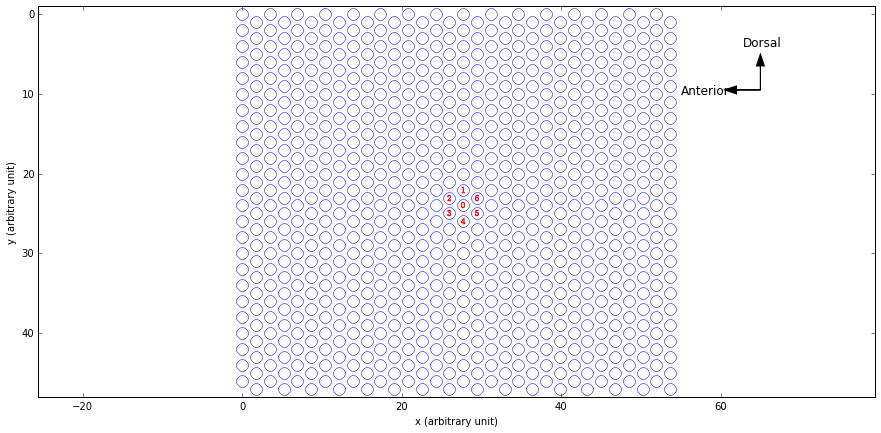

In [6]:
p.figure(figsize=(15,7))
X = lamina.hexarray.X
Y = lamina.hexarray.Y
p.plot(X.reshape(-1), Y.reshape(-1), 'o', markerfacecolor = 'w', 
       markeredgecolor = 'b', markersize = 12)
p.axis('equal')
p.axis([X.min()-1, X.max()+1, Y.min()-1, Y.max()+1])
p.xlabel('x (arbitrary unit)')
p.ylabel('y (arbitrary unit)')
p.gca().invert_yaxis()

# label one cartridge position
center_row = 12
center_col = 16
p.plot(X[center_row, center_col], Y[center_row, center_col], 
       marker = '$0$', markeredgecolor = 'r', hold = True) 

# find and label all its neighbors, the numbers are used for 
# column 'cart' in the synapse_lamina.csv
neighbors = lamina.hexarray.find_neighbor(center_row, center_col)
for neighbor, i in zip(neighbors[1:], range(1,7)):
    if neighbor is not None:
        neighbor_row = lamina.hexarray.row[neighbor]
        neighbor_col = lamina.hexarray.col[neighbor]
        p.plot(X[neighbor_row, neighbor_col], Y [neighbor_row, neighbor_col], 
               marker = '$'+str(i)+'$', markeredgecolor = 'r', hold = True) 
    
tx1 = p.text(55, 10, 'Anterior', fontsize=12)
ar1 = p.arrow(65, 9.5, -3, 0, head_width = 1, color = 'k')
tx2 = p.text(63, 4, 'Dorsal', fontsize = 12)
ar2 = p.arrow(65, 9.5, 0, -3, head_width = 1, color = 'k')

We now create all the cartridges. Each cartridge contains one copy of all specified columnar neurons and elements as well as all the intra-cartridge connections. Individual neurons and synapses in each cartridge can be accessed as follows:

In [7]:
lamina.create_cartridges()
lamina.cartridges[100]

Isolated cartridge at 0x2b9dc37e70d0

In [8]:
lamina.cartridges[100].neurons['L2']

neuron L2: {'phi': 0.0025, 'initn': 0.5, 'output': 1, 'offset': 0.02, 'extern': 0, 'spiking': False, 'name': 'L2', 'V1': -0.001, 'initV': -0.05, 'V2': 0.015, 'V3': -0.05, 'V4': 0.001, 'input': 0, 'model': 'MorrisLecar', 'columnar': 1, 'public': 1}

In [9]:
lamina.cartridges[100].synapses[8]

synapse from R3 to L2: {'slope': 0.02, 'saturation': 0.0008, 'postname': 'L2', 'reverse': -0.08, 'power': 1.0, 'cart': 0, 'delay': 1.0, 'prename': 'R3', 'conductance': True, 'scale': 37.0, 'mode': 0, 'threshold': -0.05214, 'model': 'power_gpot_gpot', 'class': 3}

We assign each cartridge to a position on the hexagonal grid and link it to its 6 immediate neighbor cartridges; the first element of the neighbors attribute is the cartridge itself, while the remaining 6 elements are its neighbors:

In [10]:
lamina.connect_cartridges()
lamina.cartridges[100].neighbors

[Cartridge at (6.928203230275509, 6.0),
 Cartridge at (6.928203230275509, 4.0),
 Cartridge at (5.196152422706632, 5.0),
 Cartridge at (5.196152422706632, 7.0),
 Cartridge at (6.928203230275509, 8.0),
 Cartridge at (8.660254037844386, 7.0),
 Cartridge at (8.660254037844386, 5.0)]

The non-columnar neurons are created as follows:

In [11]:
lamina.create_non_columnar_neurons()

After all the cartridges and non-columnar neurons are created, we can specify interconnects between cartridges based on the composition rules. We first configure inter-cartridge synapses based on Composition Rule II:

In [12]:
lamina.connect_composition_II()

In the example below, the L4 neuron in cartridge 100 (shown as a red dot), receives inputs (green lines) from neurons in some neighboring cartridges (green dots), and provides outputs (blue lines) to neurons in other neighboring cartridges (blue dots):

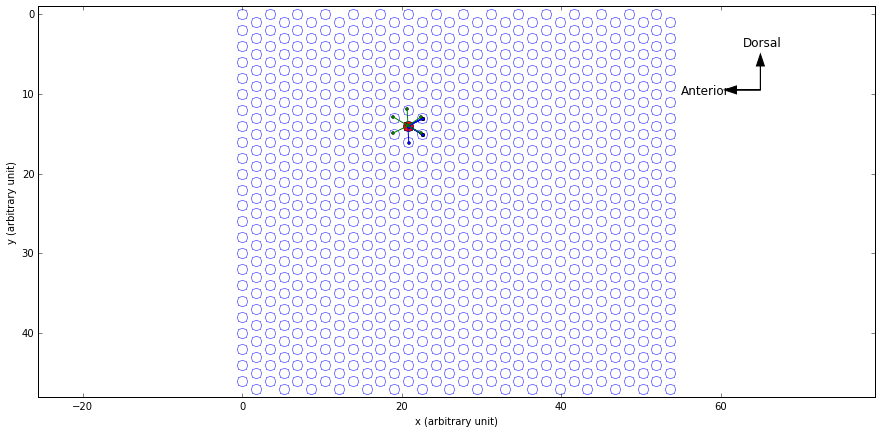

In [13]:
p.figure(figsize=(15,7))
p.plot(X.reshape(-1), Y.reshape(-1), 'o', markerfacecolor = 'w', 
       markeredgecolor = 'b', markersize = 10)
p.axis('equal')
p.axis([X.min()-1, X.max()+1, Y.min()-1, Y.max()+1])
p.gca().invert_yaxis()

# plot the position of L4 neuron in cartridge 236
neuron = lamina.cartridges[236].neurons['L4']
x, y = neuron.position()
p.plot(x, y, 'o', markerfacecolor = 'r', markersize = 10, hold = True)

# plot the positions of the neuron the L4 neuron is presynaptic to
for synapse in neuron.outgoing_synapses:
    post_x, post_y = synapse.post_neuron.position()
    p.plot(post_x+0.1, post_y+0.1, 'o', markerfacecolor = 'b', markersize = 3, hold = True)
    p.plot([x, post_x+0.1], [y, post_y+0.1], 'b', hold = True)

# plot the positions of the neuron the L4 neuron is postsynaptic to
for synapse in neuron.incoming_synapses:
    pre_x, pre_y = synapse.pre_neuron.position()
    p.plot(pre_x-0.1, pre_y-0.1, 'o', markerfacecolor = 'g', markersize = 3, hold = True)
    p.plot([x, pre_x-0.1], [y, pre_y-0.1], 'g', hold = True)
    
p.xlabel('x (arbitrary unit)')
p.ylabel('y (arbitrary unit)')
tx1 = p.text(55, 10, 'Anterior', fontsize=12)
ar1 = p.arrow(65, 9.5, -3, 0, head_width = 1, color = 'k')
tx2 = p.text(63, 4, 'Dorsal', fontsize = 12)
ar2 = p.arrow(65, 9.5, 0, -3, head_width = 1, color = 'k')

We then configure inter-cartridge synapses based on Composition Rule I:

In [14]:
lamina.connect_composition_I()

In the example below, amacrine cell 0 (red dot) receives inputs (green lines) from neurons in several neighboring cartridges (green dots), and provides outputs (blue lines) to neurons in other neighboring cartridges (blue dots):

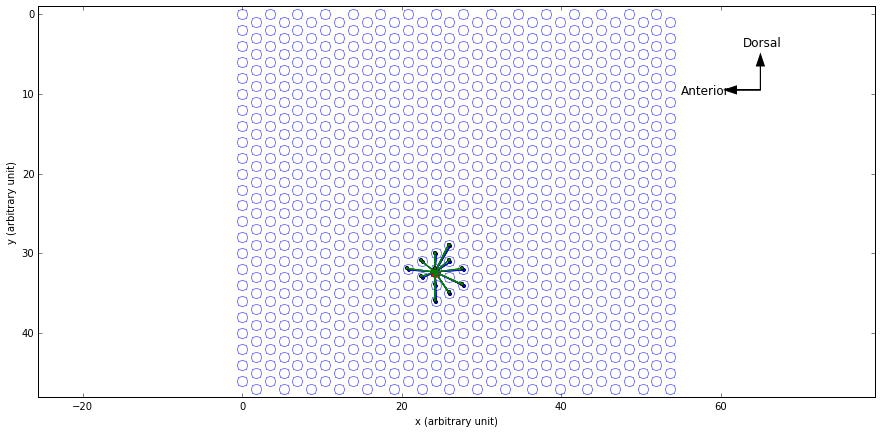

In [15]:
p.figure(figsize = (15,7))
p.plot(X.reshape(-1), Y.reshape(-1), 'o', markerfacecolor = 'w', 
       markeredgecolor = 'b', markersize = 10)
p.axis('equal')
p.axis([X.min()-1, X.max()+1, Y.min()-1, Y.max()+1])
p.gca().invert_yaxis()

# plot the position of Amacrine cell 240
neuron = lamina.non_columnar_neurons['Am'][240]
x, y = neuron.position()
p.plot(x, y, 'o', markerfacecolor = 'r', markersize = 10, hold = True)

# plot the positions of the neuron the Am 240 is presynaptic to
for synapse in neuron.outgoing_synapses:
    post_x, post_y = synapse.post_neuron.position()
    p.plot(post_x+0.1, post_y+0.1, 'o', markerfacecolor = 'b', markersize = 3, hold = True)
    p.plot([x, post_x+0.1], [y, post_y+0.1], 'b', hold = True)
# plot the positions of the neuron the Am 0 is postsynaptic to
for synapse in neuron.incoming_synapses:
    pre_x, pre_y = synapse.pre_neuron.position()
    p.plot(pre_x-0.1, pre_y-0.1, 'o', markerfacecolor = 'g', markersize = 3, hold = True)
    p.plot([x, pre_x-0.1], [y, pre_y-0.1], 'g', hold = True)

p.xlabel('x (arbitrary unit)')
p.ylabel('y (arbitrary unit)')
tx1 = p.text(55, 10, 'Anterior', fontsize=12)
ar1 = p.arrow(65, 9.5, -3, 0, head_width = 1, color = 'k')
tx2 = p.text(63, 4, 'Dorsal', fontsize = 12)
ar2 = p.arrow(65, 9.5, 0, -3, head_width = 1, color = 'k')

We now specify selectors to each public neuron to enable possible connections to other LPUs:

In [16]:
lamina.add_selectors()

The selector of cartridge neurons, e.g., L1 neurons, are of the form

In [17]:
lamina.cartridges[0].neurons['L1'].params['selector']

'/lamina/cart0/L1'

Finally, we output the full configuration to [GEXF](http://gexf.net) file format that can be used to instantiate the lamina LPU:

In [18]:
lamina.export_to_gexf('lamina.gexf.gz')

### Executing the Combined Lamina and Medulla Model

Once again assuming that the Neurokernel source has been cloned to `~/neurokernel`, we first create GEXF files containing the configurations for both the lamina and medulla models:

In [19]:
%cd -q ~/neurokernel/examples/vision/data
%run generate_vision_gexf.py

We then generate an input of duration 1.0 seconds:

In [20]:
%run gen_vis_input.py

Finally, we execute the model.  Note that if you have access to only 1 GPU, replace ``--med_dev 1`` with ``--med_dev 0`` in the third line below; this will force both the lamina and medulla models to use the same GPU (at the expense of slower execution):

In [21]:
%cd -q ~/neurokernel/examples/vision
%run vision_demo.py --lam_dev 0 --med_dev 1

Next, we generate a video of the membrane potentials of specific neurons in the two LPUs:

In [22]:
%run visualize_output.py

The visualization script produces a video that depicts an input signal provided to a grid comprising neurons associated with each of the 768 cartridges in one of the fly's eyes as well as the response of select neurons in the corresponding columns in the retina/lamina and medulla LPUs.

The resulting video (hosted on YouTube) can be viewed below:

In [23]:
import IPython.display
IPython.display.YouTubeVideo('5eB78fLl1AM')

The three response animations correspond to the specific neurons depicted below:

<img src="files/files/vision-pipeline.png" />

### Acknowledgements

The vision model demonstrated in this notebook was developed by Nikul H. Ukani and Yiyin Zhou.

### References

<a name="#fischbach_optic_1989"></a>Fischbach, K.-F. and Dittrich, A. (1989), The optic lobe of Drosophila melanogaster. I. a Golgi analysis of wild-type structure, Cell and Tissue Research, 258, 3, doi:10.1007/BF00218858<br /><br />
<a name="#higgins_computational_2004"></a>Higgins, C. M., Douglass, J. K., and Strausfeld, N. J. (2004), The computational basis of an identified neuronal circuit for elementary motion detection in dipterous insects, Visual Neuroscience, 21, 04, 567–586, doi:10.1017/S0952523804214079<br /><br />
<a name="#rivera-alba_wiring_2011"></a>Rivera-Alba, M., Vitaladevuni, S. N., Mishchenko, Y., Lu, Z., Takemura, S.-Y., Scheffer, L., et al. (2011), Wiring economy and volume exclusion determine neuronal placement in the Drosophila brain, Current Biology, 21, 23, 2000–2005, doi:10.1016/j.cub.2011.10.022<br /><br />